In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Reading Basic Info About Data

In [3]:
pd.read_excel('Data Dictionary.xlsx')

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconi...
2,Color,Colour of the cubic zirconia.With D being the...
3,Clarity,cubic zirconia Clarity refers to the absence ...
4,Depth,"The Height of a cubic zirconia, measured from..."
5,Table,The Width of the cubic zirconia's Table expre...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


In [2]:
df = pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


- total datapoints are 26967
- There are three Object type features [cut, color, clarity]
- There are 6 Numerical type features [carat, depth, table, x, y, z, price]
- Obvious, Price is target column.

In [5]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

- Oops, there are 697 missing values present in depth feature.
- No worries, We can handle this.

In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


- Just take some idea about mean, median, min, max

#### Conclusion about dataset

- dataset has id feature, which is totally waste for any information.
- has some null values.
- There are three features need to be converted into numerical feature for model training purpose.

# Feature engineering

Feature engineering is a crucial step in the data science process that involves transforming raw data into meaningful features that can improve the performance of machine learning models. By selecting, creating, or transforming features, data scientists aim to enhance the representation of the data and enable the models to better understand patterns and make accurate predictions.

Effective feature engineering requires a combination of domain knowledge, creativity, and data exploration techniques. Some common techniques used in feature engineering include:

## Feature Selection

1. Heatmap
A heatmap is a graphical representation of data where values in a matrix are visualized using a color gradient. Heatmaps are commonly used to display relationships, patterns, or variations in data across two dimensions.

2. Correlation 
Correlation is a statistical measure that quantifies the relationship between two variables. It indicates the extent to which changes in one variable are associated with changes in another variable. The correlation coefficient, typically denoted by "r," ranges from -1 to 1, where:

- A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases linearly.
- A correlation coefficient of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases linearly.
- A correlation coefficient of 0 indicates no linear relationship between the variables


C:\Users\Ankit\AppData\Local\Temp\ipykernel_7880\137304800.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


<Axes: >

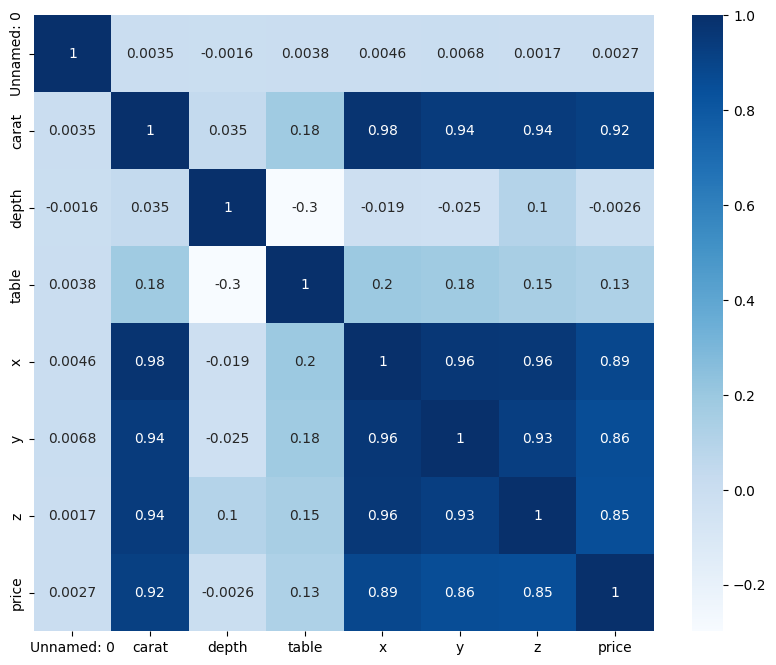

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Highly correlated features can introduce multicollinearity, which can negatively impact the performance of certain machine learning algorithms and make it harder to interpret the importance of individual features.
so we can drop features with more correlation.

In [8]:
def get_high_correlation_features(data, threshold):
    # Compute the correlation matrix
    correlation_matrix = data.corr()
    
    # Find features with correlation greater than the threshold
    high_corr_features = set()
    for row in correlation_matrix.columns:
        for col in correlation_matrix.columns:
            if(correlation_matrix[row][col] > threshold and row != col):
                high_corr_features.add(row)
    
    return high_corr_features

The function get_high_correlation_features takes a dataset and a correlation threshold as input.
It computes the correlation matrix of the dataset and identifies features with correlation coefficients greater than the threshold, excluding self-correlations.
It returns a set of the high correlation features found.

In [10]:
high_correlated_features = get_high_correlation_features(df.drop(['price'], axis = 1),0.85)
high_correlated_features

C:\Users\Ankit\AppData\Local\Temp\ipykernel_7880\3635675734.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


{'carat', 'x', 'y', 'z'}

Four of these features are highly correlated, so we consider to drop x, y, z from dataset.

In [11]:
df = df.drop(['x', 'y', 'z'], axis = 1)
df = df.drop(['Unnamed: 0'], axis = 1)

- Also see there is a Extra column named as Unnamed: 0
- we also dropped it

## Feature Encoding
Converting categorical variables into numerical representations that can be understood by machine learning algorithms. This can involve techniques like one-hot encoding, label encoding, or ordinal encoding.

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,Ideal,E,SI1,62.1,58.0,499
1,0.33,Premium,G,IF,60.8,58.0,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6289
3,0.42,Ideal,F,VS1,61.6,56.0,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,779


- cut, color, clarity should be converted

In [13]:
# Unique value for these three features
print('Unique values for diamond cut :', df['cut'].unique())
print('Unique values for diamond color :', df['color'].unique())
print('Unique values for diamond clarity :', df['clarity'].unique())

Unique values for diamond cut : ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Unique values for diamond color : ['E' 'G' 'F' 'D' 'H' 'J' 'I']
Unique values for diamond clarity : ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


- Without Domain Expert, we cannot properly encode it.
So we use Internet 

from website :- https://www.brilliantearth.com/diamond/buying-guide/carat/?gclid=Cj0KCQjwl92XBhC7ARIsAHLl9an3M1BVcdpYQzZX08KIkOpJLcEo2VFAh0VFpSUsvATY73afBxGyVO4aAkYJEALw_wcB


- We Got

Cut grading
Diamonds are graded into the following cuts:(best to worst)

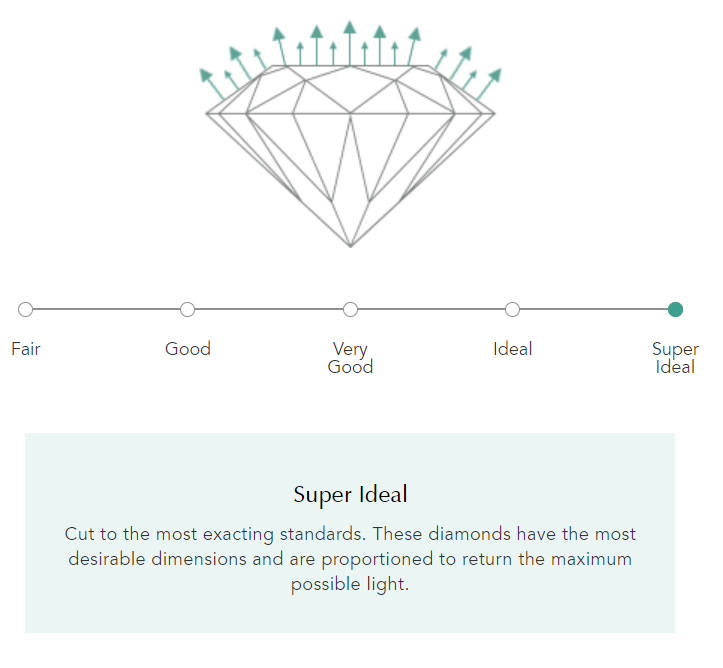

In [14]:
# Labeling cut based on given list 
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
df['cut'] = df['cut'].map(cut_map)

Price vs color: the exception of fancy color diamonds

from website :- https://mydiamondring.com/en/article/830429

- We Got
Diamonds are valued by how closely they come to being colorless. The less color, the higher their value.

- D, E, F: are colorless
- G, H, I, J: are near-colorless

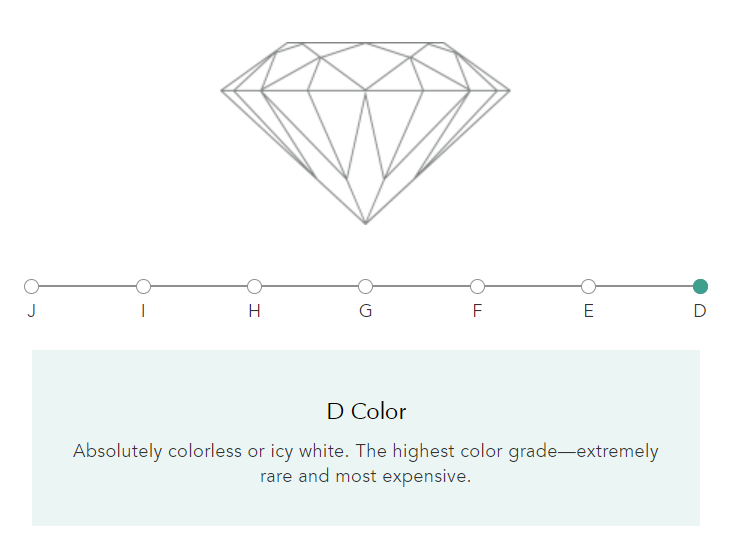

In [15]:
# Labeling color based on given list 
df['color'] = df['color'].map({"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7})


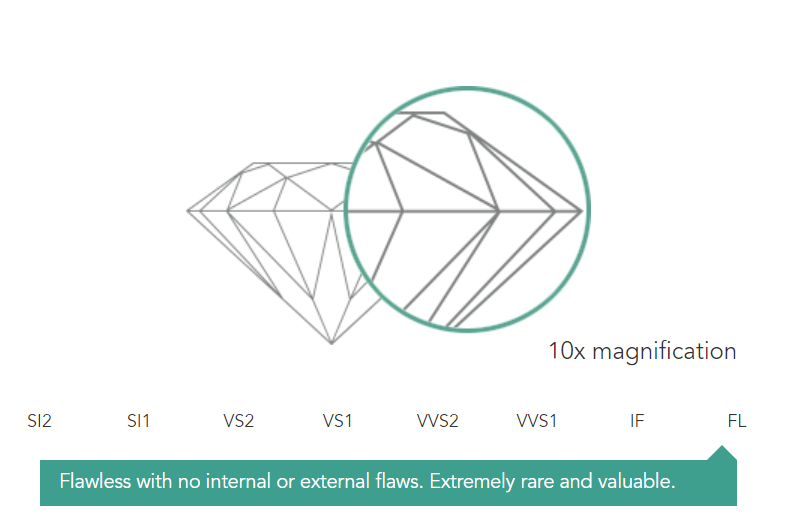

In [16]:
# Labeling clarity based on given list
df['clarity'] = df['clarity'].map({"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int64  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   price    26967 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.4 MB


Now we can all the features in numerical datatype

# Handling Missing Values:
Dealing with missing data by imputing or filling in the missing values using various methods like mean imputation, median imputation, or sophisticated imputation techniques such as K-nearest neighbors (KNN) or regression imputation.

- We have a column 'depth', which has 697 missing values.

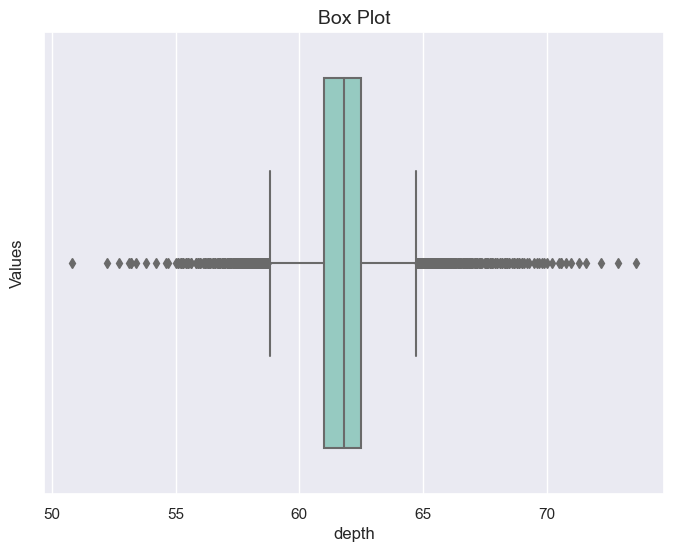

In [18]:
## Seeing outlier in depth

import seaborn as sns
import matplotlib.pyplot as plt

# Set a Seaborn theme
sns.set_theme()

# Adjust the color palette
custom_palette = sns.color_palette("Set3")
# Set figure size
plt.figure(figsize=(8, 6))
# Set labels and title
plt.xlabel('Depth', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Box Plot', fontsize=14)


sns.boxplot(x=df['depth'], palette=custom_palette)

# Display the plot
plt.show()

- It indicates that there are extreme values or observations that deviate significantly from the central tendency of the data in both the positive and negative directions.

<Axes: xlabel='depth', ylabel='price'>

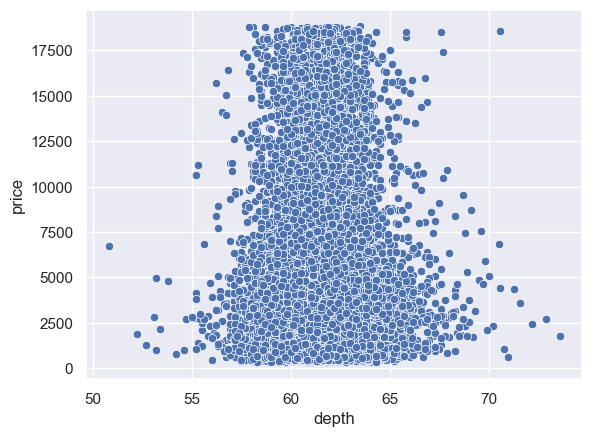

In [19]:
sns.scatterplot(x=df['depth'], y=df['price'])

In [20]:
print('Mean for depth :', df['depth'].mean())
print('Median for depth :', df['depth'].median())

Mean for depth : 61.74514655500572
Median for depth : 61.8


There is not significance difference between mean and median.
So, choosing mean to fill the missing value would be right.

In [21]:
df['depth'].fillna(df['depth'].mean(), inplace=True)

In [22]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

We handled null values

# Visualization

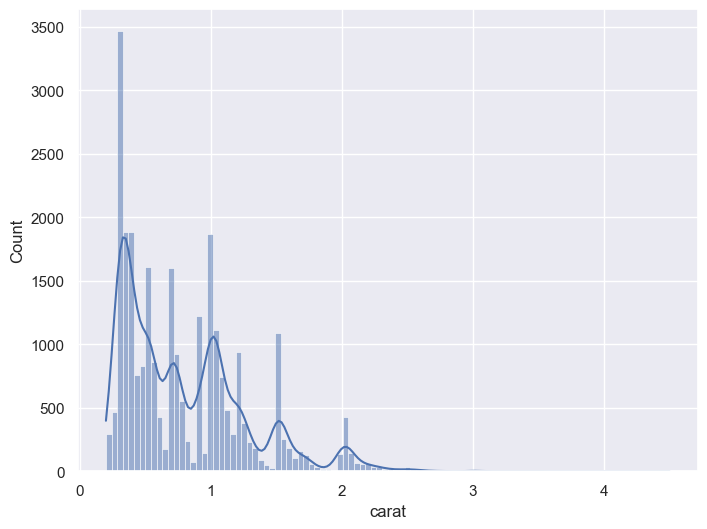

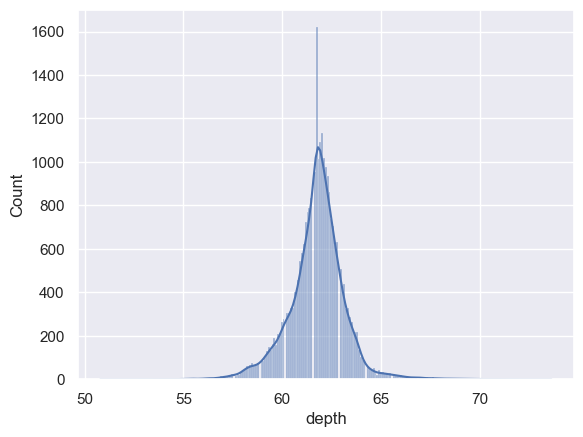

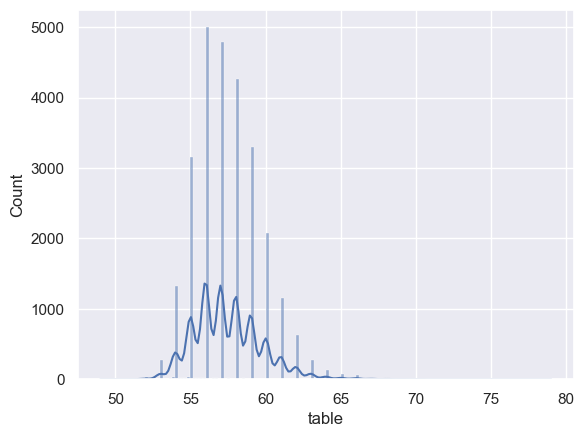

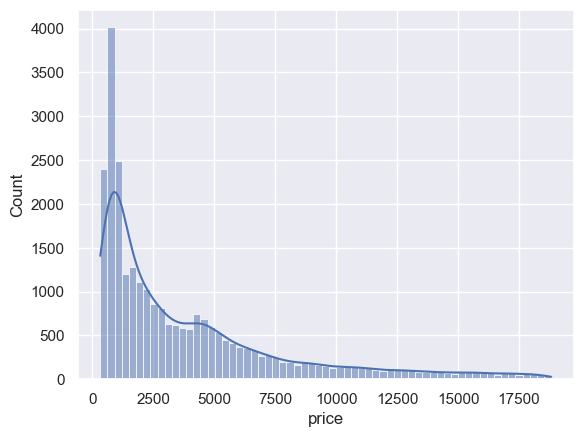

In [23]:
feature = ['carat', 'depth', 'table', 'price']
plt.figure(figsize=(8,6))
x=0
for i in feature:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

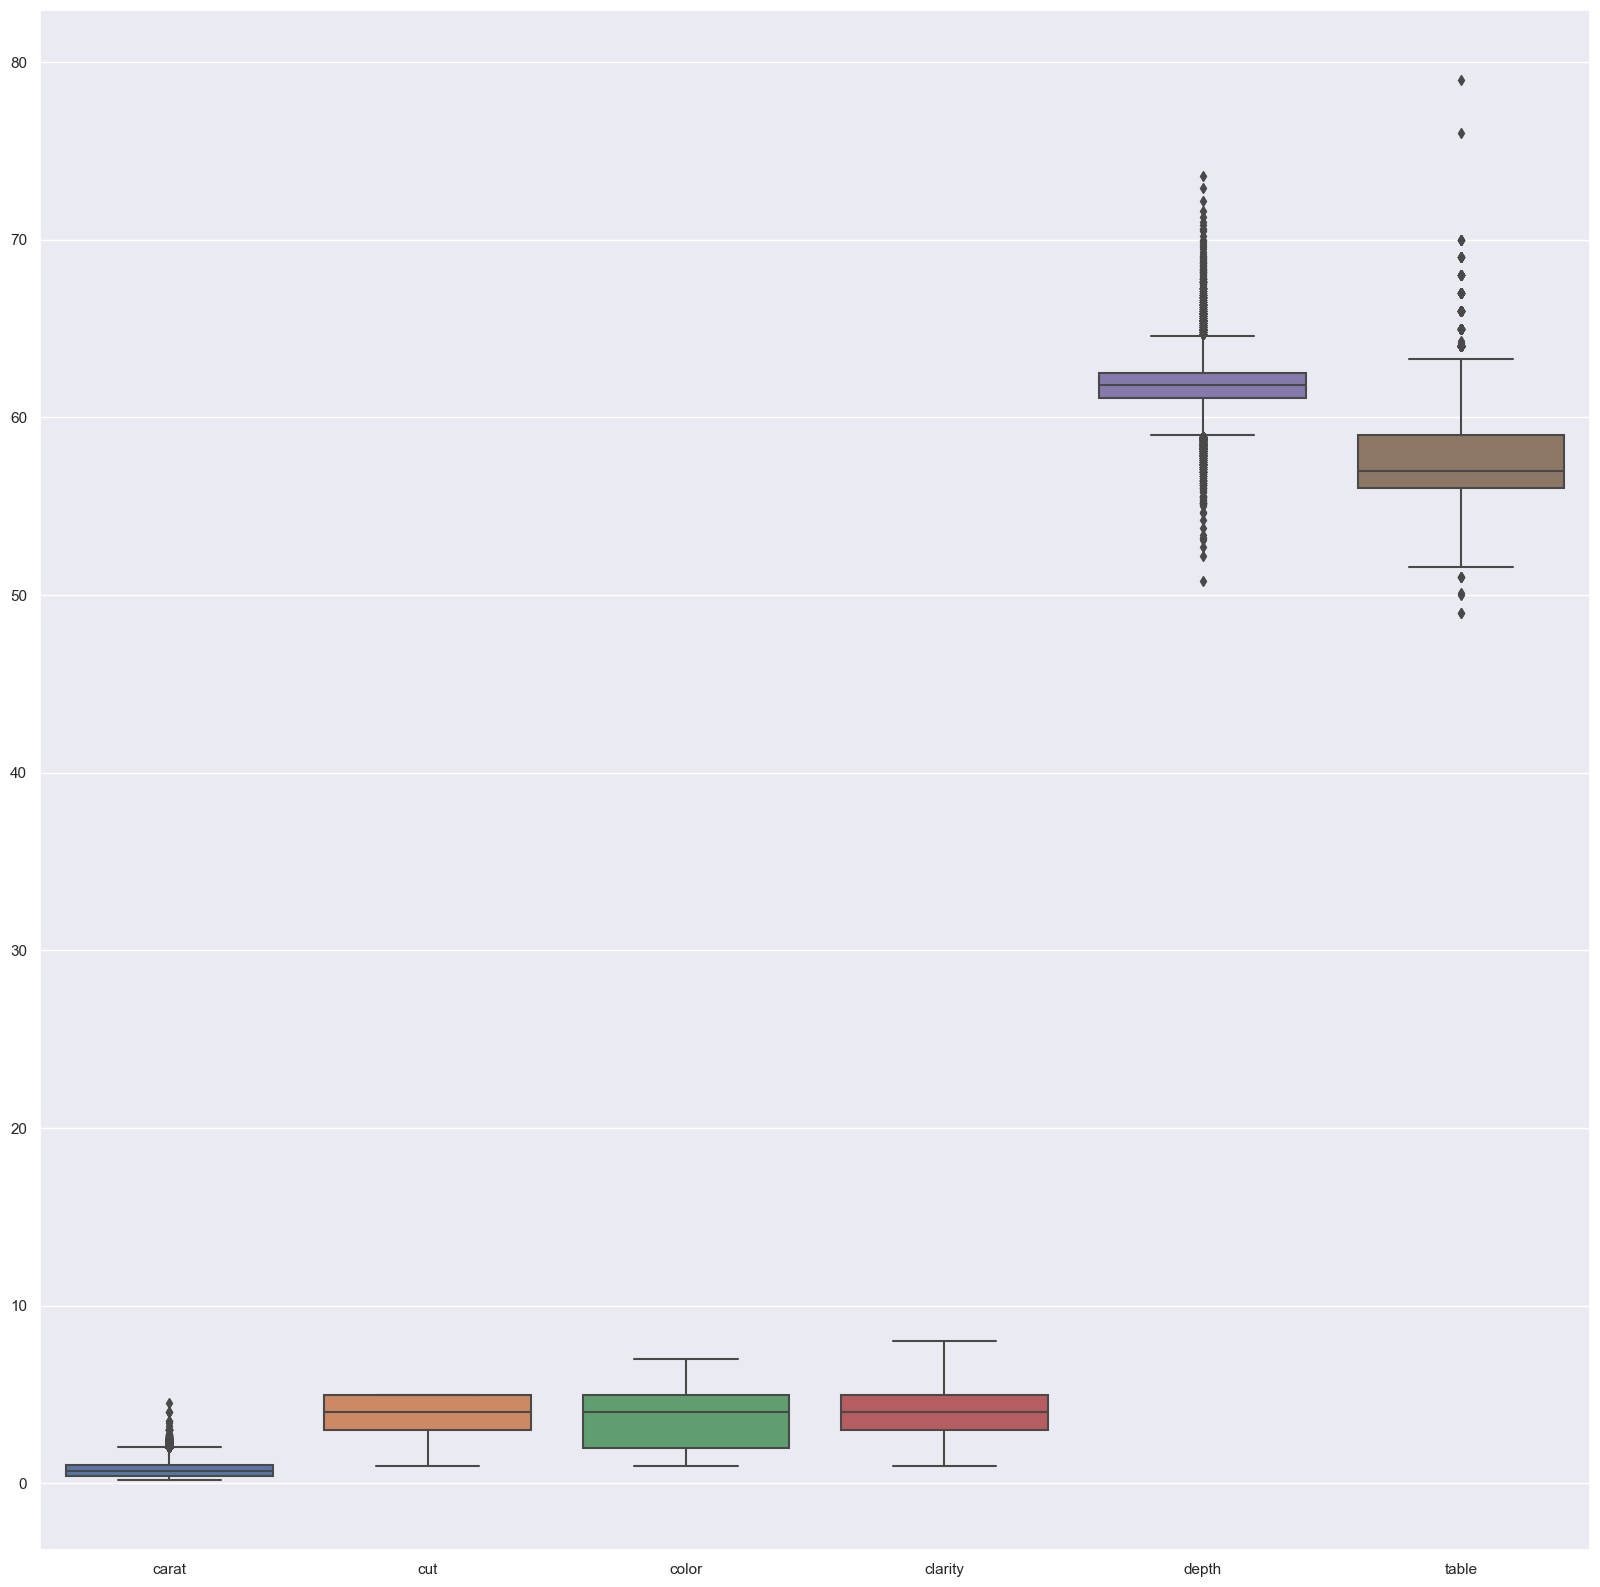

In [24]:
plt.figure(figsize=(20,20))
sns.boxplot(df.drop(['price'], axis=1))

- Box plot shows outlier in both the directions.

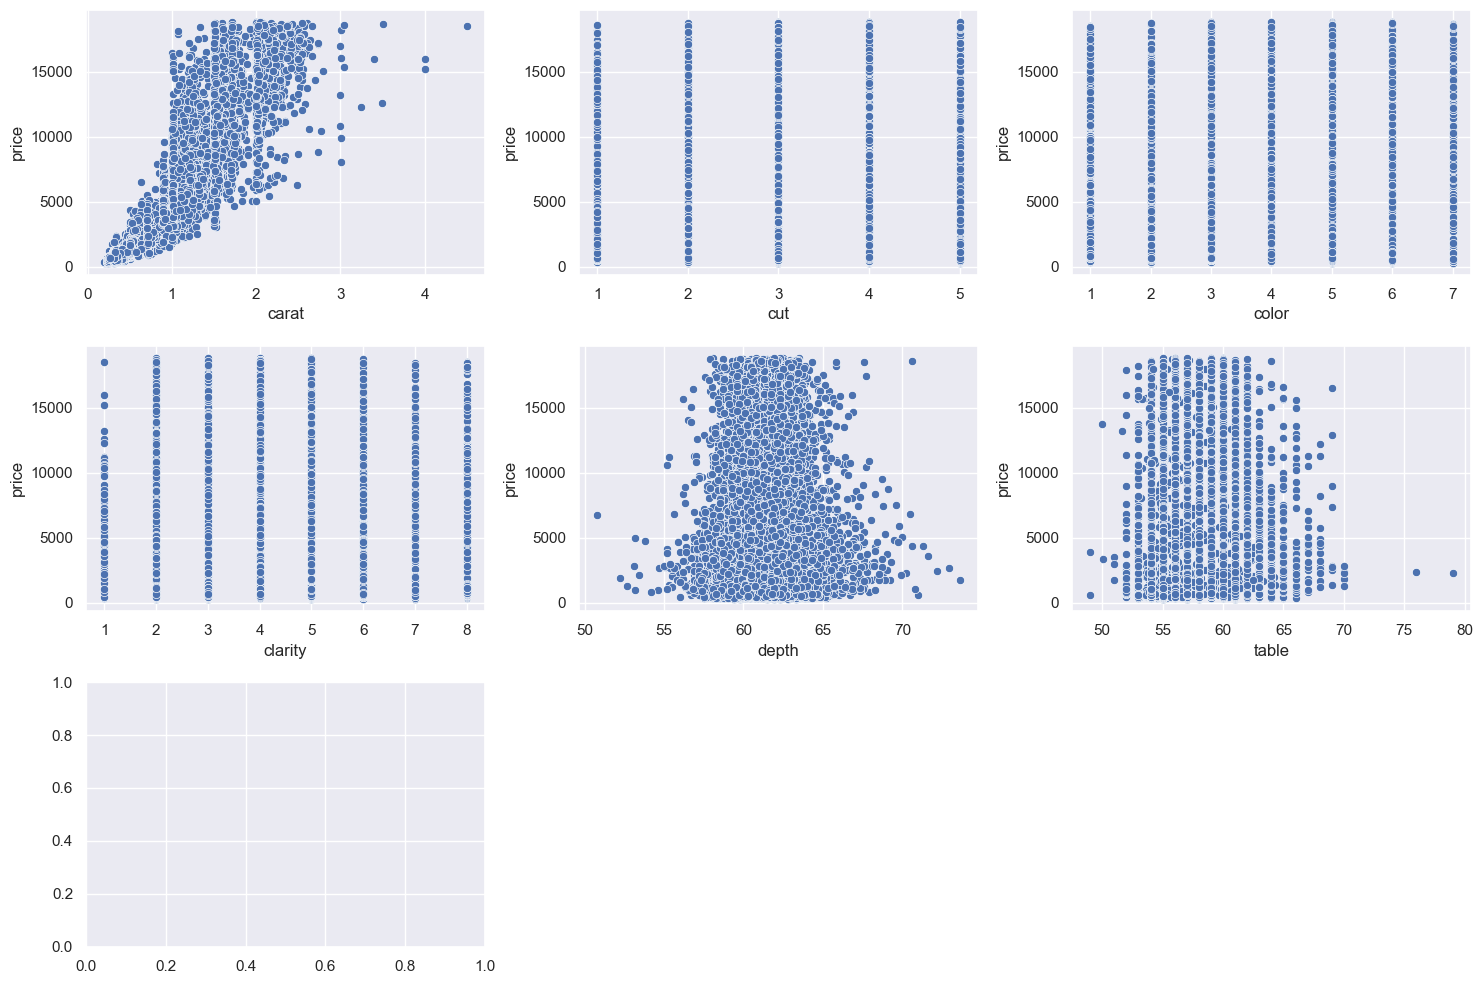

In [25]:
# Set the number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(df.columns) - 1) // n_cols + 1

# Create a figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop through each feature (excluding 'price') and create scatter plots
for i, feature in enumerate(df.columns):
    if feature != 'price':
        if feature != 'price':
            sns.scatterplot(x=df[feature], y=df['price'], ax=axes[i])
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('price')

# Remove any empty subplots if the number of features is not divisible by n_cols
if len(df.columns) % n_cols != 0:
    for j in range(len(df.columns) % n_cols, n_cols):
        fig.delaxes(axes[-j])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()



- Carat has some linear relation type with price.

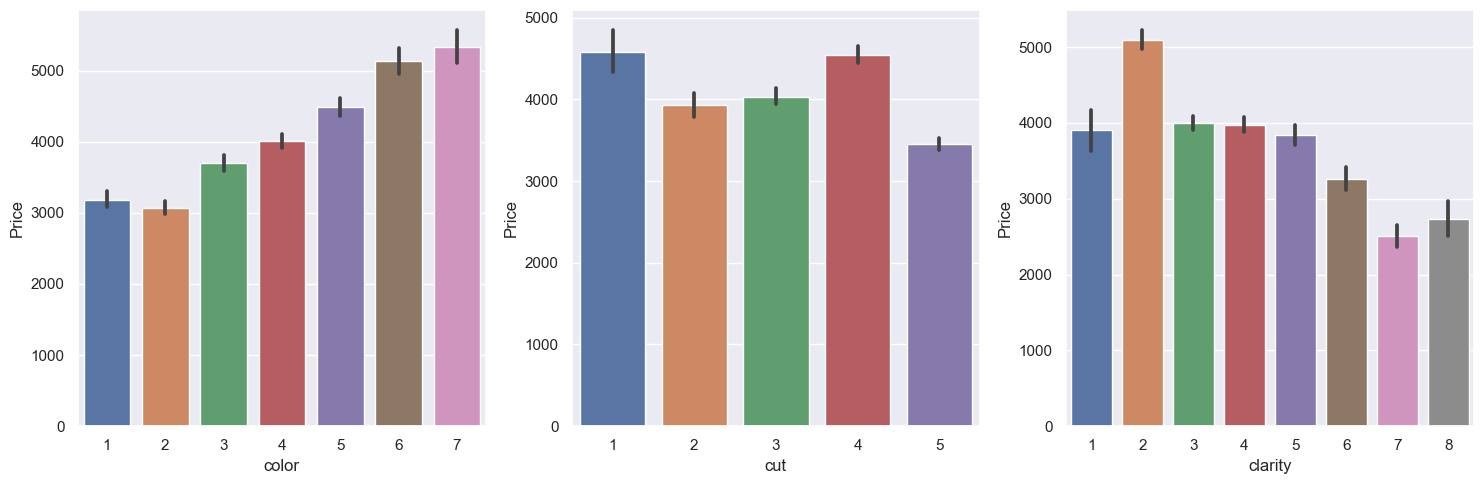

In [26]:
n_cols = 3
n_rows = 1

# Create a figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5))
axes = axes.flatten()

# create bar plots
for i, feature in enumerate(['color', 'cut', 'clarity']):
    sns.barplot(x=feature, y='price', data=df, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

if len(['color', 'cut', 'clarity']) % n_cols != 0:
    for j in range(len(['color', 'cut', 'clarity']) % n_cols, n_cols):
        fig.delaxes(axes[-j])

# Adjust subplots
fig.tight_layout()
plt.show()


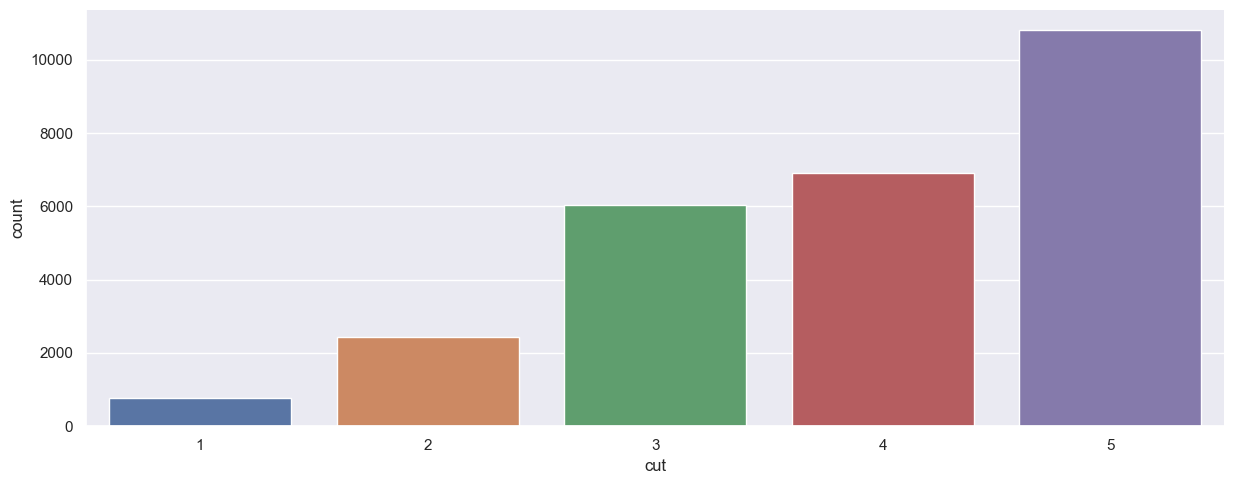

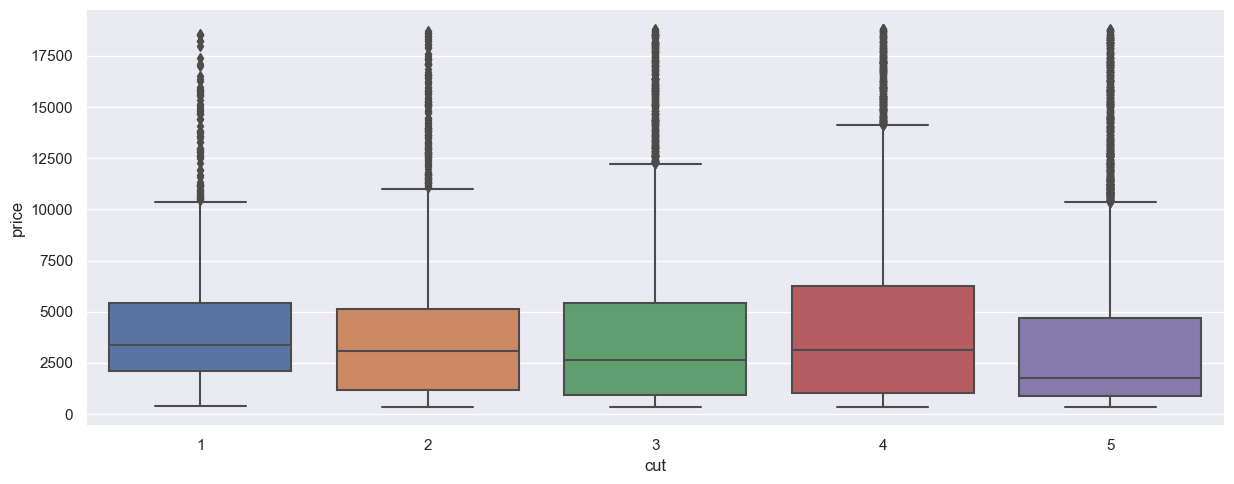

In [27]:
# plot for "cut"
sns.catplot(x= "cut", data = df, kind = "count", aspect = 2.5)
sns.catplot(x = "cut", y = "price", kind = "box", data = df, aspect = 2.5)

- Ideal cut has the highest count with Premium cut being the most expensive

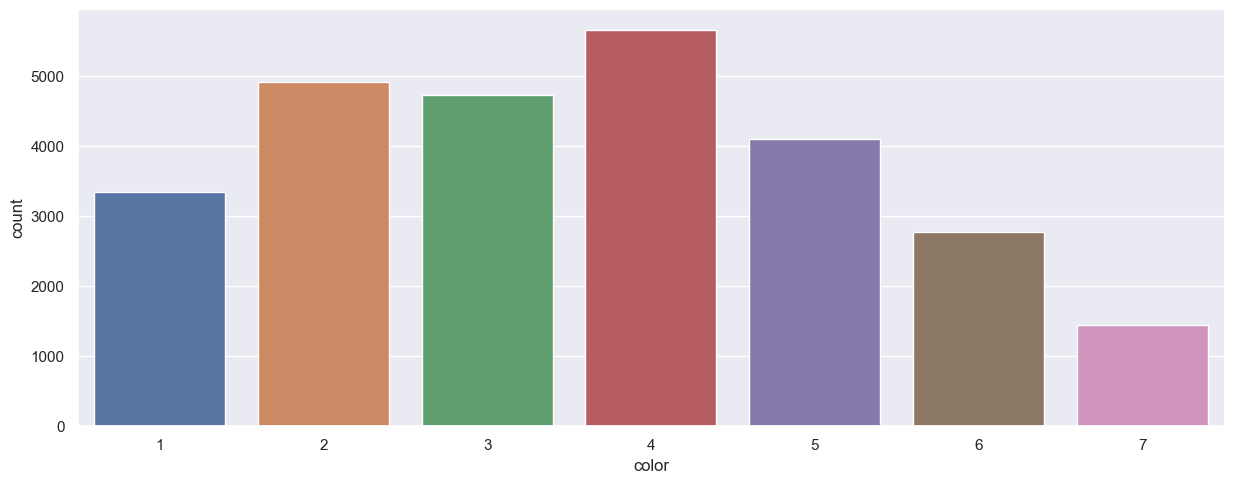

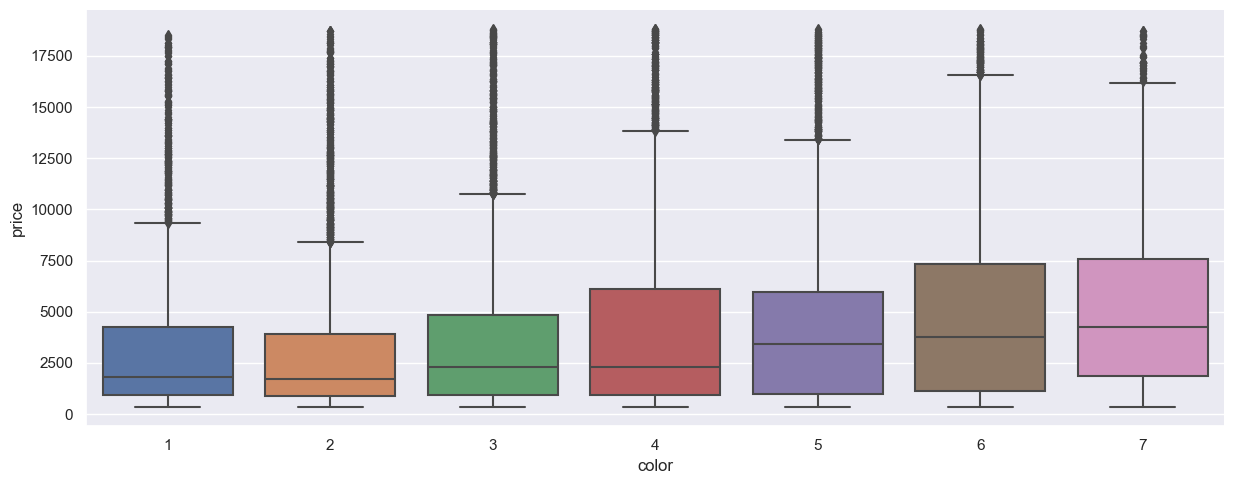

In [28]:
# plot for "color"
sns.catplot(x = "color", data = df, kind = "count", aspect = 2.5)
sns.catplot(x = "color", y = "price", kind = "box", data = df, aspect = 2.5)

- G color has the highest count with J color being the most expensive.

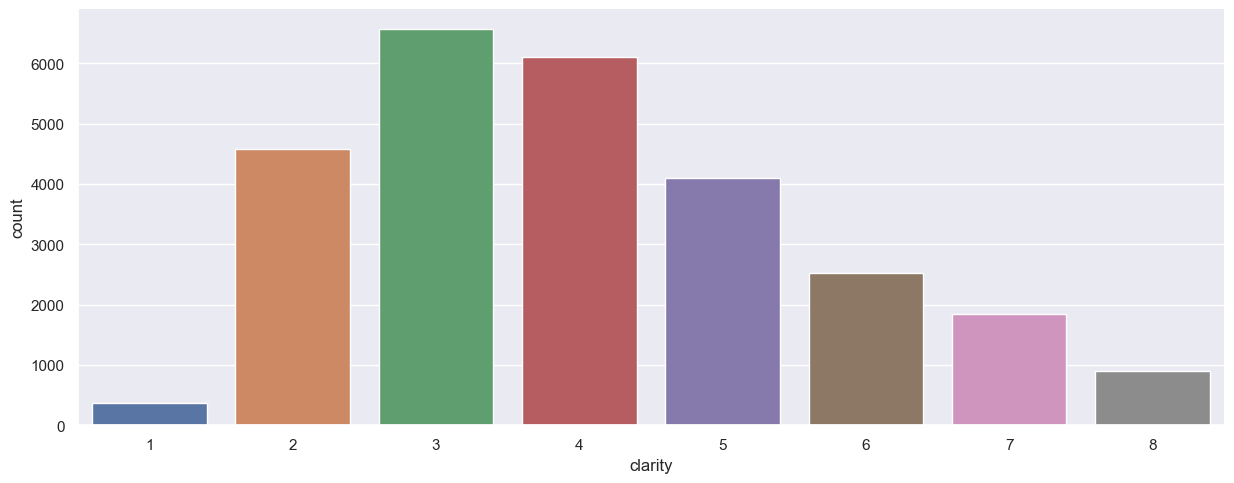

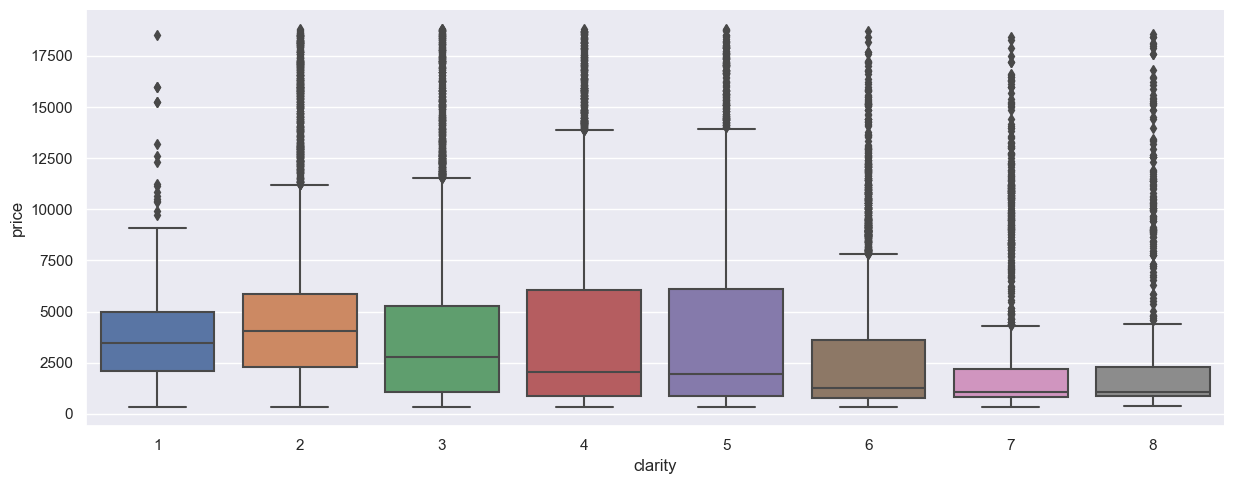

In [29]:
# plot for "clarity"
sns.catplot(x ="clarity", data = df, kind = "count", aspect = 2.5)
sns.catplot(x = "clarity", y = "price", kind = "box", data = df, aspect = 2.5)

- SI1 clarity has the highest count with VS1 & VS2 being the most expensive